In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import argparse

In [2]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-d", "--data", required=True, help="Data file")

# data_file = ap.parse_args().data

In [3]:
data = pd.read_csv("sml.csv")
print(data)

instance       algorithm  randomSeed  epsilon  horizon      REG
0     i-1.txt     round-robin           0      0.0       50     15.0
1     i-1.txt     round-robin           1      0.0       50      8.0
2     i-1.txt     round-robin           2      0.0       50     15.0
3     i-1.txt     round-robin           3      0.0       50     14.0
4     i-1.txt     round-robin           4      0.0       50     13.0
...       ...             ...         ...      ...      ...      ...
7345  i-3.txt  epsilon-greedy          45      0.2   204800  16949.0
7346  i-3.txt  epsilon-greedy          46      0.2   204800  16636.0
7347  i-3.txt  epsilon-greedy          47      0.2   204800  17039.0
7348  i-3.txt  epsilon-greedy          48      0.2   204800  16874.0
7349  i-3.txt  epsilon-greedy          49      0.2   204800  16905.0

[7350 rows x 6 columns]


In [4]:
data

,instance,algorithm,randomSeed,epsilon,horizon,REG
0,i-1.txt,round-robin,0,0.0,50,15.0
1,i-1.txt,round-robin,1,0.0,50,8.0
2,i-1.txt,round-robin,2,0.0,50,15.0
3,i-1.txt,round-robin,3,0.0,50,14.0
4,i-1.txt,round-robin,4,0.0,50,13.0
...,...,...,...,...,...,...
7345,i-3.txt,epsilon-greedy,45,0.2,204800,16949.0
7346,i-3.txt,epsilon-greedy,46,0.2,204800,16636.0
7347,i-3.txt,epsilon-greedy,47,0.2,204800,17039.0
7348,i-3.txt,epsilon-greedy,48,0.2,204800,16874.0


In [5]:
data = data.groupby(['instance'])

In [6]:
datas = [data.get_group(x) for x in data.groups]

In [7]:
data.mean()

,randomSeed,epsilon,horizon,REG
instance,,,,
i-1.txt,24.5,0.031714,39007.142857,1427.583673
i-2.txt,24.5,0.031714,39007.142857,1542.457551
i-3.txt,24.5,0.031714,39007.142857,3223.437959


In [8]:
test = datas[0].groupby(['algorithm', 'epsilon'])
test = [test.get_group(x) for x in test.groups]

# sub = test[0].groupby(['horizon']).mean()
sub = test[0]
algo = sub.algorithm.mode()
algo.values[0]


'epsilon-greedy'

In [9]:
algos = {
    
}

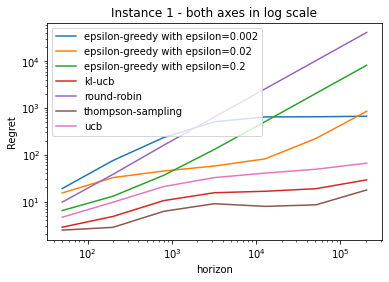

In [10]:
inst1 = datas[0].groupby(['algorithm', 'epsilon'])
inst1 = [inst1.get_group(x) for x in inst1.groups]

fig, ax = plt.subplots()

for sub_inst in inst1:
    algo = sub_inst.algorithm.mode().values[0]
    if(algo == 'epsilon-greedy'):
        epsilon = sub_inst.epsilon.mode().values[0]
        algo = algo+" with epsilon="+str(epsilon)

    sub_inst = sub_inst.groupby(['horizon']).mean()
    ax = sub_inst.plot(kind='line', y='REG', logx=True, logy=True, ax=ax, label=algo)


plt.ylabel('Regret')
plt.title('Instance 1 - both axes in log scale')

plt.savefig('instance1.png')

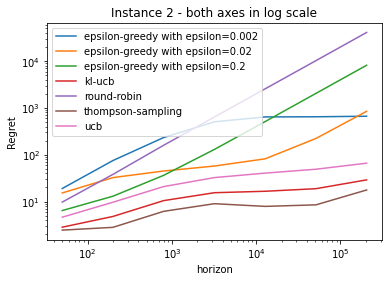

In [13]:
inst2 = datas[0].groupby(['algorithm', 'epsilon'])
inst2 = [inst2.get_group(x) for x in inst2.groups]

fig, ax = plt.subplots()

for sub_inst in inst2:
    algo = sub_inst.algorithm.mode().values[0]
    if(algo == 'epsilon-greedy'):
        epsilon = sub_inst.epsilon.mode().values[0]
        algo = algo+" with epsilon="+str(epsilon)

    sub_inst = sub_inst.groupby(['horizon']).mean()
    ax = sub_inst.plot(kind='line', y='REG', logx=True, logy=True, ax=ax, label=algo)

plt.ylabel('Regret')
plt.title('Instance 2 - both axes in log scale')
plt.savefig('instance2.png')

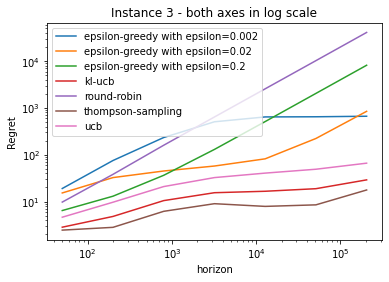

In [14]:
inst3 = datas[0].groupby(['algorithm', 'epsilon'])
inst3 = [inst3.get_group(x) for x in inst3.groups]

fig, ax = plt.subplots()

for sub_inst in inst3:
    algo = sub_inst.algorithm.mode().values[0]
    if(algo == 'epsilon-greedy'):
        epsilon = sub_inst.epsilon.mode().values[0]
        algo = algo+" with epsilon="+str(epsilon)

    sub_inst = sub_inst.groupby(['horizon']).mean()
    ax = sub_inst.plot(kind='line', y='REG', logx=True, logy=True, ax=ax, label=algo)

plt.ylabel('Regret')
plt.title('Instance 3 - both axes in log scale')
plt.savefig('instance3.png')